# Diet Recommendation System

## Framing the problem and looking at the big picture

1. **Define the objective in business terms:** A food recommendation system is a tool that is designed to help businesses in the food industry improve customer satisfaction and loyalty by providing personalized recommendations for food and drinks based on an individual's preferences and past orders. The primary objective of a food recommendation system is to increase sales and revenue by encouraging customers to try new menu items and by encouraging repeat business. This can be achieved by analyzing customer data and using machine learning algorithms to understand patterns in customer behavior and preferences, and by presenting recommendations that are tailored to the individual's tastes and needs. By using a food recommendation system, businesses can improve their customer retention rates, increase customer satisfaction, and ultimately drive growth and profitability.

2. **How can the solution be used:** The solution can be used in a website application or even a mobile app.

3. **How should you frame this problem ( supervised/unsupervised, online/offline,...):** The problem can be initially framed as an unsupervised, offline, and model-based learning problem, as it involves building a recommendation model from a dataset without labeled data. However, it can also be viewed as a supervised learning problem if we apply KMeans Clustering to generate labels for the data. In this scenario, the problem would involve preprocessing the data with KMeans Clustering to create labeled datasets, which can then be used for training a supervised learning model for recommendation. Therefore, the problem encompasses both unsupervised and supervised approaches, depending on the methodology employed.

## Basic Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [3]:
df = pd.read_csv('recipes.csv')

## Exploring the Raw Dataset

In [4]:
df.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

In [6]:
df.describe()

,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,522517.000000,5.225170e+05,269294.000000,275028.000000,522517.000000,522517.000000,522517.000000,522517.000000,5.225170e+05,522517.000000,522517.000000,522517.000000,522517.000000,339606.000000
mean,271821.436970,4.572585e+07,4.632014,5.227784,484.438580,24.614922,9.559457,86.487003,7.672639e+02,49.089092,3.843242,21.878254,17.469510,8.606191
std,155495.878422,2.929714e+08,0.641934,20.381347,1397.116649,111.485798,46.622621,301.987009,4.203621e+03,180.822062,8.603163,142.620191,40.128837,114.319809
min,38.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,137206.000000,6.947400e+04,4.500000,1.000000,174.200000,5.600000,1.500000,3.800000,1.233000e+02,12.800000,0.800000,2.500000,3.500000,4.000000
50%,271758.000000,2.389370e+05,5.000000,2.000000,317.100000,13.800000,4.700000,42.600000,3.533000e+02,28.200000,2.200000,6.400000,9.100000,6.000000
75%,406145.000000,5.658280e+05,5.000000,4.000000,529.100000,27.400000,10.800000,107.900000,7.922000e+02,51.100000,4.600000,17.900000,25.000000,8.000000
max,541383.000000,2.002886e+09,5.000000,3063.000000,612854.600000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000,18396.200000,32767.000000


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RecipeId,522517.0,NaN,NaN,NaN,271821.43697,155495.878422,38.0,137206.0,271758.0,406145.0,541383.0
Name,522517,438188,Banana Bread,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AuthorId,522517.0,NaN,NaN,NaN,45725847.894476,292971448.66643,27.0,69474.0,238937.0,565828.0,2002886148.0
AuthorName,522517,56793,ratherbeswimmin,7742,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CookTime,439972,490,PT30M,50715,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrepTime,522517,318,PT10M,120265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalTime,522517,1240,PT30M,41590,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DatePublished,522517,245540,1999-12-01T20:03:00Z,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,522512,492838,Make and share this Banana Bread recipe from F...,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Images,522516,165889,character(0),356620,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(522517, 28)

In [9]:
df.dtypes

RecipeId                        int64
Name                           object
AuthorId                        int64
AuthorName                     object
CookTime                       object
PrepTime                       object
TotalTime                      object
DatePublished                  object
Description                    object
Images                         object
RecipeCategory                 object
Keywords                       object
RecipeIngredientQuantities     object
RecipeIngredientParts          object
AggregatedRating              float64
ReviewCount                   float64
Calories                      float64
FatContent                    float64
SaturatedFatContent           float64
CholesterolContent            float64
SodiumContent                 float64
CarbohydrateContent           float64
FiberContent                  float64
SugarContent                  float64
ProteinContent                float64
RecipeServings                float64
RecipeYield 

In [10]:
df.isnull().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
RecipeYield                   348071
R

In [11]:
(df.isnull().sum()/(len(df)))*100

RecipeId                       0.000000
Name                           0.000000
AuthorId                       0.000000
AuthorName                     0.000000
CookTime                      15.797572
PrepTime                       0.000000
TotalTime                      0.000000
DatePublished                  0.000000
Description                    0.000957
Images                         0.000191
RecipeCategory                 0.143727
Keywords                       3.298840
RecipeIngredientQuantities     0.000574
RecipeIngredientParts          0.000000
AggregatedRating              48.462155
ReviewCount                   47.364775
Calories                       0.000000
FatContent                     0.000000
SaturatedFatContent            0.000000
CholesterolContent             0.000000
SodiumContent                  0.000000
CarbohydrateContent            0.000000
FiberContent                   0.000000
SugarContent                   0.000000
ProteinContent                 0.000000


In [12]:
df.nunique()

RecipeId                      522517
Name                          438188
AuthorId                       57178
AuthorName                     56793
CookTime                         490
PrepTime                         318
TotalTime                       1240
DatePublished                 245540
Description                   492838
Images                        165889
RecipeCategory                   311
Keywords                      216569
RecipeIngredientQuantities    459571
RecipeIngredientParts         497120
AggregatedRating                   9
ReviewCount                      420
Calories                       30138
FatContent                      4523
SaturatedFatContent             2533
CholesterolContent              9803
SodiumContent                  40455
CarbohydrateContent             8102
FiberContent                    1067
SugarContent                    6008
ProteinContent                  2581
RecipeServings                   171
RecipeYield                    34043
R

In [13]:
df.tail()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
522512,541379,Meg's Fresh Ginger Gingerbread,2002090414,rdsxc,PT35M,PT1H,PT1H35M,2020-12-22T15:27:00Z,Make and share this Meg's Fresh Ginger Gingerb...,character(0),...,7.6,54.4,278.2,48.5,0.8,22.8,3.9,8.0,1 8x8 cake pan,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak..."
522513,541380,Roast Prime Rib au Poivre with Mixed Peppercorns,211566,Denver cooks,PT3H,PT30M,PT3H30M,2020-12-22T15:32:00Z,"White, black, green, and pink peppercorns add ...","""https://img.sndimg.com/food/image/upload/w_55...",...,71.4,433.8,766.3,3.2,0.7,0.1,117.0,8.0,1 Roast,"c(""Position rack in center of oven and preheat..."
522514,541381,Kirshwasser Ice Cream,2001131545,Jonathan F.,PT3H,PT1H,PT4H,2020-12-22T15:33:00Z,Make and share this Kirshwasser Ice Cream reci...,character(0),...,72.6,470.9,192.5,33.9,0.0,17.3,12.8,6.0,NaN,"c(""heat half and half and heavy cream to a sim..."
522515,541382,Quick & Easy Asian Cucumber Salmon Rolls,2001004241,CLUBFOODY,NaN,PT15M,PT15M,2020-12-22T22:11:00Z,"Extremely quick and easy to make, these are gr...","""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,2.9,100.5,0.3,0.0,0.1,2.4,NaN,20 rolls,"c(""In a small bowl, combine mayo and wasabi pa..."
522516,541383,Spicy Baked Scotch Eggs,188099,Chef LauraMD,PT25M,PT15M,PT40M,2020-12-22T22:12:00Z,"Great way to have hard boiled eggs and crispy,...",character(0),...,22.2,1769.7,1318.6,29.7,1.3,6.7,76.4,NaN,NaN,"c(""Mix sausage, panko, egg yolk and Wocestersh..."


## Extracting the Data

In [14]:
data=df.copy()

In [15]:
columns=['RecipeId','Name','CookTime','PrepTime','TotalTime','RecipeIngredientParts','Calories','FatContent','SaturatedFatContent','CholesterolContent','SodiumContent','CarbohydrateContent','FiberContent','SugarContent','ProteinContent','RecipeInstructions']
data=data[columns]

In [16]:
max_Calories=2000
max_daily_fat=100
max_daily_Saturatedfat=13
max_daily_Cholesterol=300
max_daily_Sodium=2300
max_daily_Carbohydrate=325
max_daily_Fiber=40
max_daily_Sugar=40
max_daily_Protein=200
max_list=[max_Calories,max_daily_fat,max_daily_Saturatedfat,max_daily_Cholesterol,max_daily_Sodium,max_daily_Carbohydrate,max_daily_Fiber,max_daily_Sugar,max_daily_Protein]

In [17]:
dataset=data.copy()
for column,maximum in zip(dataset.columns[6:15],max_list):
    dataset=dataset[dataset[column]<maximum]

## Exploring the Extracted Data

In [18]:
dataset.head()

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,PT30M,PT20M,PT50M,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil..."
7,45,Buttermilk Pie With Gingersnap Crumb Crust,PT50M,PT30M,PT1H20M,"c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...",228.0,7.1,1.7,24.5,281.8,37.5,0.5,24.7,4.2,"c(""Preheat oven to 350°F."", ""Make pie crust, u..."
8,46,A Jad - Cucumber Pickle,NaN,PT25M,PT25M,"c(""rice vinegar"", ""haeo"")",4.3,0.0,0.0,0.0,0.7,1.1,0.2,0.2,0.1,"c(""Slice the cucumber in four lengthwise, then..."


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375703 entries, 0 to 522515
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               375703 non-null  int64  
 1   Name                   375703 non-null  object 
 2   CookTime               313207 non-null  object 
 3   PrepTime               375703 non-null  object 
 4   TotalTime              375703 non-null  object 
 5   RecipeIngredientParts  375703 non-null  object 
 6   Calories               375703 non-null  float64
 7   FatContent             375703 non-null  float64
 8   SaturatedFatContent    375703 non-null  float64
 9   CholesterolContent     375703 non-null  float64
 10  SodiumContent          375703 non-null  float64
 11  CarbohydrateContent    375703 non-null  float64
 12  FiberContent           375703 non-null  float64
 13  SugarContent           375703 non-null  float64
 14  ProteinContent         375703 non-nu

In [20]:
dataset.describe()

,RecipeId,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
count,375703.000000,375703.000000,375703.000000,375703.000000,375703.000000,375703.000000,375703.000000,375703.000000,375703.000000,375703.000000
mean,275084.657703,270.247748,12.100561,4.026418,45.536062,414.893038,28.073583,3.028031,8.710871,12.417852
std,154175.875299,180.326416,10.517498,3.498783,54.913524,429.530159,24.069048,3.649611,9.124826,13.488612
min,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,143349.500000,137.700000,4.300000,1.000000,0.300000,93.000000,10.700000,0.700000,2.100000,2.700000
50%,276908.000000,238.700000,9.800000,3.100000,25.700000,271.100000,22.900000,1.900000,5.300000,6.800000
75%,407916.500000,366.500000,17.400000,6.400000,70.700000,603.500000,39.200000,4.000000,12.300000,19.000000
max,541382.000000,1993.800000,98.900000,12.900000,299.900000,2299.800000,323.400000,39.900000,39.900000,181.900000


In [21]:
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RecipeId,375703.0,NaN,NaN,NaN,275084.657703,154175.875299,38.0,143349.5,276908.0,407916.5,541382.0
Name,375703,322226,Banana Bread,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CookTime,313207,386,PT20M,36687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrepTime,375703,254,PT10M,91177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalTime,375703,966,PT30M,32152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RecipeIngredientParts,375703,358137,character(0),1918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Calories,375703.0,NaN,NaN,NaN,270.247748,180.326416,0.0,137.7,238.7,366.5,1993.8
FatContent,375703.0,NaN,NaN,NaN,12.100561,10.517498,0.0,4.3,9.8,17.4,98.9
SaturatedFatContent,375703.0,NaN,NaN,NaN,4.026418,3.498783,0.0,1.0,3.1,6.4,12.9
CholesterolContent,375703.0,NaN,NaN,NaN,45.536062,54.913524,0.0,0.3,25.7,70.7,299.9


In [22]:
dataset.shape

(375703, 16)

In [23]:
dataset.dtypes

RecipeId                   int64
Name                      object
CookTime                  object
PrepTime                  object
TotalTime                 object
RecipeIngredientParts     object
Calories                 float64
FatContent               float64
SaturatedFatContent      float64
CholesterolContent       float64
SodiumContent            float64
CarbohydrateContent      float64
FiberContent             float64
SugarContent             float64
ProteinContent           float64
RecipeInstructions        object
dtype: object

In [24]:
dataset.nunique()

RecipeId                 375703
Name                     322226
CookTime                    386
PrepTime                    254
TotalTime                   966
RecipeIngredientParts    358137
Calories                  10600
FatContent                  913
SaturatedFatContent         130
CholesterolContent         2985
SodiumContent             20731
CarbohydrateContent        2174
FiberContent                396
SugarContent                400
ProteinContent             1034
RecipeInstructions       373978
dtype: int64

In [25]:
dataset.isnull().sum()

RecipeId                     0
Name                         0
CookTime                 62496
PrepTime                     0
TotalTime                    0
RecipeIngredientParts        0
Calories                     0
FatContent                   0
SaturatedFatContent          0
CholesterolContent           0
SodiumContent                0
CarbohydrateContent          0
FiberContent                 0
SugarContent                 0
ProteinContent               0
RecipeInstructions           0
dtype: int64

In [26]:
for column in dataset.columns:
    print("Column:", column)
    print("NaN count:", dataset[column].isna().sum())
    print("Empty space count:", (dataset[column] == ' ').sum())
    print("Null count:", (dataset[column].isnull()).sum())
    print("Zero count:", (dataset[column] == 0).sum())
    print("Unknown count:", (dataset[column] == 'Unknown').sum())
    print("---------------------------------------")

Column: RecipeId
NaN count: 0
Empty space count: 0
Null count: 0
Zero count: 0
Unknown count: 0
---------------------------------------
Column: Name
NaN count: 0
Empty space count: 0
Null count: 0
Zero count: 0
Unknown count: 0
---------------------------------------
Column: CookTime
NaN count: 62496
Empty space count: 0
Null count: 62496
Zero count: 0
Unknown count: 0
---------------------------------------
Column: PrepTime
NaN count: 0
Empty space count: 0
Null count: 0
Zero count: 0
Unknown count: 0
---------------------------------------
Column: TotalTime
NaN count: 0
Empty space count: 0
Null count: 0
Zero count: 0
Unknown count: 0
---------------------------------------
Column: RecipeIngredientParts
NaN count: 0
Empty space count: 0
Null count: 0
Zero count: 0
Unknown count: 0
---------------------------------------
Column: Calories
NaN count: 0
Empty space count: 0
Null count: 0
Zero count: 3004
Unknown count: 0
---------------------------------------
Column: FatContent
NaN coun

In [27]:
dataset.tail()

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
522508,541375,Amazing Ground Beef Stroganoff,PT20M,PT30M,PT50M,"c(""hamburger"", ""onion"", ""celery"", ""water chest...",422.3,28.6,12.6,106.0,634.7,14.1,1.4,5.7,27.3,"c(""Saute meat in a medium skillet until it los..."
522509,541376,Spanish Coffee with Tia Maria,NaN,PT10M,PT10M,"c(""lemon wedge"", ""granulated sugar"", ""cognac"",...",84.3,2.1,1.2,6.8,15.7,16.6,0.4,15.4,0.6,"c(""Cut a small slit in the lemon wedge and sli..."
522510,541377,Slow-Cooker Classic Coffee Cake,PT3H,PT20M,PT3H20M,"c(""all-purpose flour"", ""brown sugar"", ""butter""...",358.9,19.8,10.5,103.1,323.4,41.5,0.8,24.8,4.8,"c(""Line bottom and sides of 5-quart oval slow ..."
522512,541379,Meg's Fresh Ginger Gingerbread,PT35M,PT1H,PT1H35M,"c(""fresh ginger"", ""unsalted butter"", ""dark bro...",316.6,12.5,7.6,54.4,278.2,48.5,0.8,22.8,3.9,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak..."
522515,541382,Quick & Easy Asian Cucumber Salmon Rolls,NaN,PT15M,PT15M,"c(""wasabi paste"", ""dill"", ""English cucumber"", ...",16.1,0.6,0.1,2.9,100.5,0.3,0.0,0.1,2.4,"c(""In a small bowl, combine mayo and wasabi pa..."


## Splitting the Data

### Categorical Features

In [28]:
cdf = dataset.select_dtypes(include =['object', 'bool'])
cdf.head()

,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,RecipeInstructions
0,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...","c(""Toss 2 cups berries with sugar."", ""Let stan..."
3,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...","c(""Drain the tofu, carefully squeezing out exc..."
4,Cabbage Soup,PT30M,PT20M,PT50M,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...","c(""Mix everything together and bring to a boil..."
7,Buttermilk Pie With Gingersnap Crumb Crust,PT50M,PT30M,PT1H20M,"c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...","c(""Preheat oven to 350°F."", ""Make pie crust, u..."
8,A Jad - Cucumber Pickle,NaN,PT25M,PT25M,"c(""rice vinegar"", ""haeo"")","c(""Slice the cucumber in four lengthwise, then..."


### Numerical Features

In [29]:
ndf = dataset.select_dtypes(include = ['float', 'int'])
ndf.head()

,RecipeId,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,38,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2
3,41,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3
4,42,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3
7,45,228.0,7.1,1.7,24.5,281.8,37.5,0.5,24.7,4.2
8,46,4.3,0.0,0.0,0.0,0.7,1.1,0.2,0.2,0.1


### Checking null values in cdf

In [30]:
cdf.isnull().sum()

Name                         0
CookTime                 62496
PrepTime                     0
TotalTime                    0
RecipeIngredientParts        0
RecipeInstructions           0
dtype: int64

### Checking Null Values in ndf

In [31]:
ndf.isnull().sum()

RecipeId               0
Calories               0
FatContent             0
SaturatedFatContent    0
CholesterolContent     0
SodiumContent          0
CarbohydrateContent    0
FiberContent           0
SugarContent           0
ProteinContent         0
dtype: int64

### Splitting cdf into Two Dataset

In [32]:
cate = cdf[['Name', 'RecipeIngredientParts', 'RecipeInstructions']]
cate.head()

,Name,RecipeIngredientParts,RecipeInstructions
0,Low-Fat Berry Blue Frozen Dessert,"c(""blueberries"", ""granulated sugar"", ""vanilla ...","c(""Toss 2 cups berries with sugar."", ""Let stan..."
3,Carina's Tofu-Vegetable Kebabs,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...","c(""Drain the tofu, carefully squeezing out exc..."
4,Cabbage Soup,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...","c(""Mix everything together and bring to a boil..."
7,Buttermilk Pie With Gingersnap Crumb Crust,"c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...","c(""Preheat oven to 350°F."", ""Make pie crust, u..."
8,A Jad - Cucumber Pickle,"c(""rice vinegar"", ""haeo"")","c(""Slice the cucumber in four lengthwise, then..."


In [33]:
catee = cdf[['CookTime', 'PrepTime', 'TotalTime']]
catee.head()

,CookTime,PrepTime,TotalTime
0,PT24H,PT45M,PT24H45M
3,PT20M,PT24H,PT24H20M
4,PT30M,PT20M,PT50M
7,PT50M,PT30M,PT1H20M
8,NaN,PT25M,PT25M


### Creating Pipeline for Both Datasets

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

In [35]:
class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.label_encoder = LabelEncoder()
        
    def fit(self, X, y=None):
        self.label_encoder.fit(X)
        return self
    
    def transform(self, X):
        return self.label_encoder.transform(X).reshape(-1, 1)

In [36]:
def label_encode_columns(dataframe, columns_to_encode):
    encoded_data = pd.DataFrame()
    
    for col in columns_to_encode:
        pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('label_encoder', LabelEncoderTransformer()),
            ('scaler', StandardScaler())
        ])
        
        transformed_data = pipeline.fit_transform(dataframe[[col]].astype(str))
        encoded_data[col] = transformed_data.flatten()
    
    return encoded_data

def ordinal_encode_columns(dataframe, columns_to_encode):
    encoded_data = pd.DataFrame()
    
    for col in columns_to_encode:
        pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder()),
            ('scaler', StandardScaler())
        ])
        
        transformed_data = pipeline.fit_transform(dataframe[[col]].astype(str))
        encoded_data[col] = transformed_data.flatten()
    
    return encoded_data

columns_to_encode_cate = ['Name', 'RecipeIngredientParts', 'RecipeInstructions']

columns_to_encode_catee = ['CookTime', 'PrepTime', 'TotalTime']

cate_df = label_encode_columns(cate.copy(), columns_to_encode_cate)

catee_df = ordinal_encode_columns(catee.copy(), columns_to_encode_catee)

In [37]:
cate_df.head()

,Name,RecipeIngredientParts,RecipeInstructions
0,0.145770,-1.293591,1.536337
1,-1.194865,-0.396314,-0.773780
2,-1.243047,0.821461,0.189289
3,-1.256130,1.290542,0.813068
4,-1.692860,0.990923,1.357182


In [38]:
catee_df.head()

,CookTime,PrepTime,TotalTime
0,-0.439448,1.213075,-0.320589
1,-0.550442,0.085879,-0.367134
2,0.060021,-0.036348,1.289836
3,0.773548,0.710590,-0.888428
4,1.550500,0.235266,-0.208884


In [39]:
categorical_df = pd.concat([cate_df, catee_df], axis = 1)
categorical_df.head()

,Name,RecipeIngredientParts,RecipeInstructions,CookTime,PrepTime,TotalTime
0,0.145770,-1.293591,1.536337,-0.439448,1.213075,-0.320589
1,-1.194865,-0.396314,-0.773780,-0.550442,0.085879,-0.367134
2,-1.243047,0.821461,0.189289,0.060021,-0.036348,1.289836
3,-1.256130,1.290542,0.813068,0.773548,0.710590,-0.888428
4,-1.692860,0.990923,1.357182,1.550500,0.235266,-0.208884


### Feature Distribution Before Data Preprocessing

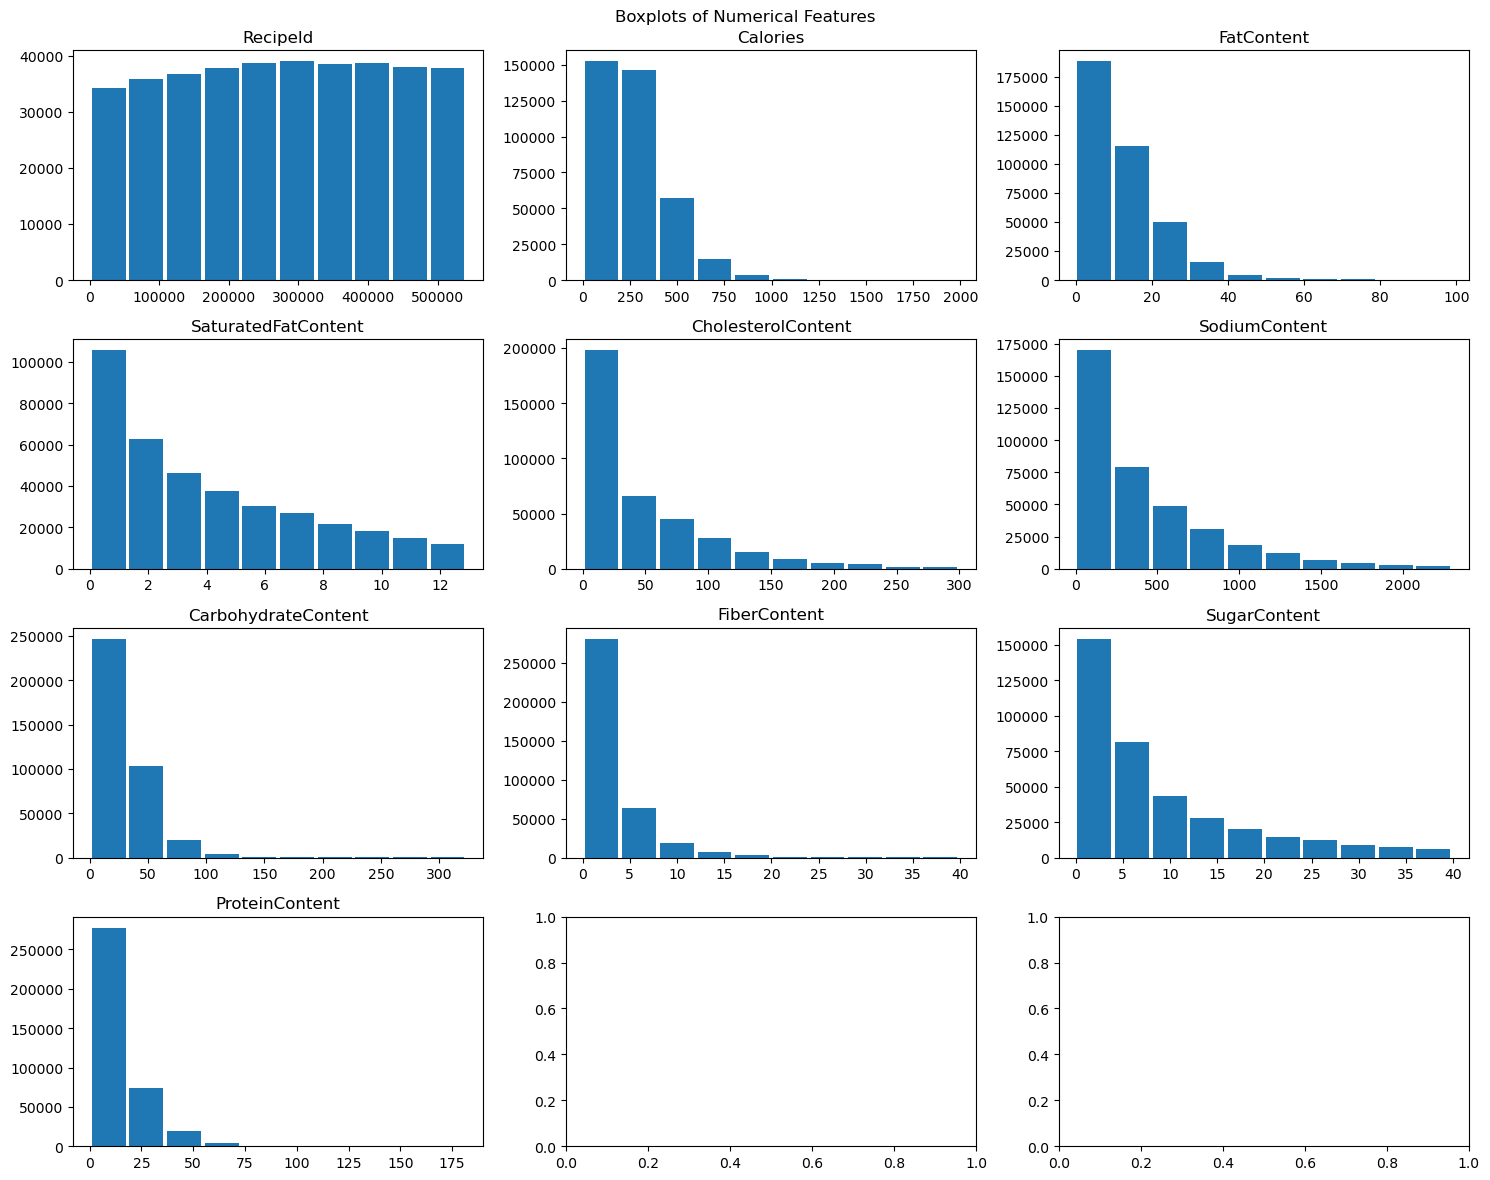

In [40]:
def create_boxplots(data):
    numerical_features = ['RecipeId', 'Calories', 'FatContent', 'SaturatedFatContent',
                          'CholesterolContent', 'SodiumContent', 'CarbohydrateContent',
                          'FiberContent', 'SugarContent', 'ProteinContent']
    data_to_plot = data[numerical_features]

    fig, axes = plt.subplots(4, 3, figsize=(15, 12))

    for i, feature in enumerate(numerical_features):
        row = int(i / 3)
        col = i % 3
        axes[row, col].hist(data_to_plot[feature], rwidth=0.9)
        axes[row, col].set_title(feature)

    fig.suptitle('Boxplots of Numerical Features')
    plt.tight_layout()
    plt.show()

create_boxplots(ndf)

### Creating Pipeline for ndf

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

In [42]:
features_to_clean = ['RecipeId', 'Calories', 'FatContent', 'SaturatedFatContent', 
                     'CholesterolContent', 'SodiumContent', 'CarbohydrateContent',
                     'FiberContent', 'SugarContent', 'ProteinContent']

class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        filtered_data = pd.DataFrame(X, columns=self.features)
        for feature in self.features:
            Q1 = filtered_data[feature].quantile(0.25)
            Q3 = filtered_data[feature].quantile(0.75)
            IQR = Q3 - Q1
            lowerlimit = Q1 - (IQR * 1.5)
            upperlimit = Q3 + (IQR * 1.5)
            filtered_data = filtered_data[(filtered_data[feature] > lowerlimit) & (filtered_data[feature] < upperlimit)]
        return filtered_data.values

def custom_transformations(data):
    data[:, 1] = np.sqrt(data[:, 1])  # Calories
    data[:, 2] = np.cbrt(data[:, 2])  # FatContent
    data[:, 3] = np.cbrt(data[:, 3])  # SaturatedFatContent
    data[:, 4] = np.cbrt(data[:, 4])  # CholesterolContent
    data[:, 5] = np.cbrt(data[:, 5])  # SodiumContent
    data[:, 6] = np.sqrt(data[:, 6])  # CarbohydrateContent
    data[:, 7] = np.sqrt(data[:, 7])  # FiberContent
    data[:, 8] = np.cbrt(data[:, 8])  # SugarContent
    data[:, 9] = np.cbrt(data[:, 9])  # ProteinContent
    return data

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('outlier_remover', OutlierRemover(features_to_clean)),
    ('custom_transformations', FunctionTransformer(custom_transformations)),
    ('scaler', StandardScaler())
])


In [43]:
preprocessor_numeric = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ndf.columns)
    ]
)

In [44]:
ndata_transformed = preprocessor_numeric.fit_transform(ndf)
numerical_df = pd.DataFrame(ndata_transformed, columns=ndf.columns)

In [45]:
numerical_df.head()

,RecipeId,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,-1.776825,-0.720812,-1.559674,-1.379243,-1.390704,1.614181,0.409337,1.365031,1.290266,-0.157405
1,-1.776805,0.348181,0.048259,-0.166534,0.342482,0.288864,1.021587,-0.795435,1.717640,-0.175037
2,-1.776799,-2.481323,-2.559290,-2.151038,-1.390704,-1.983198,-1.768235,-1.173853,-1.531166,-1.770027
3,-1.776792,-1.127399,-0.150074,-0.290901,-0.288565,-1.350546,-1.178645,-0.697166,-0.714866,-1.125854
4,-1.776773,-0.877916,-0.693752,-1.037916,0.131569,-1.190964,-0.251493,-0.522687,0.360317,-0.582257


### Checking Feature Distribution

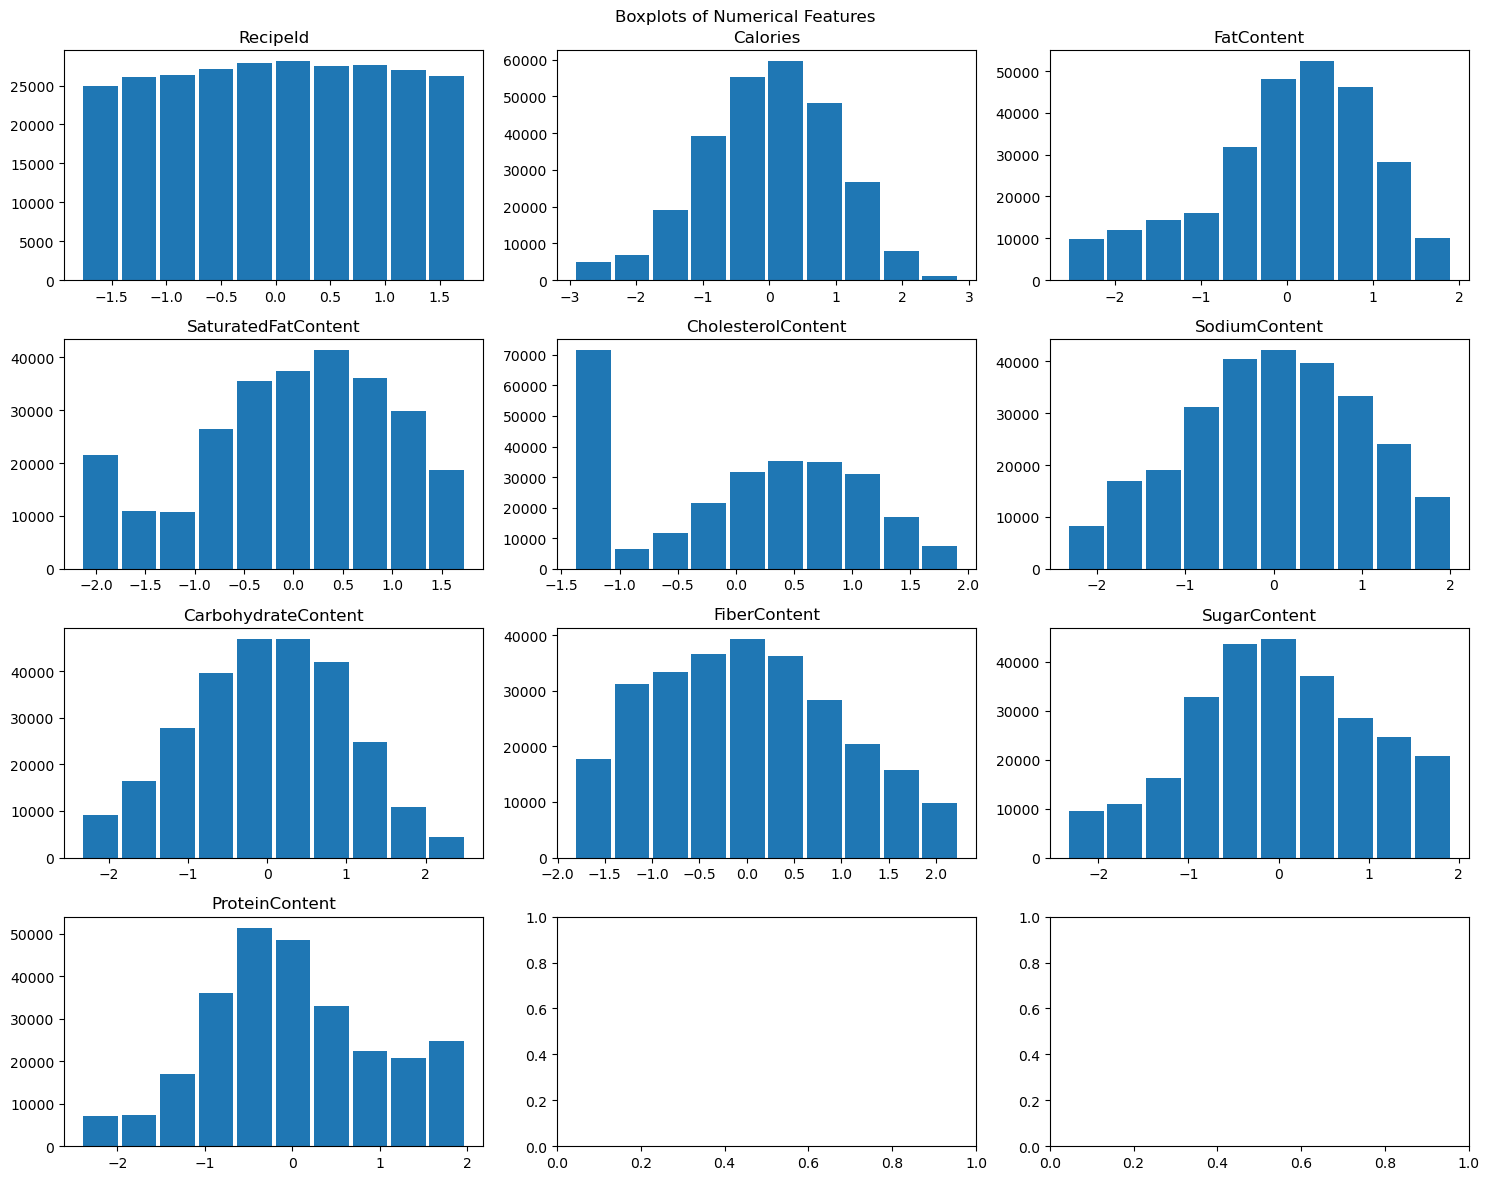

In [46]:
def create_boxplots(data):
    numerical_features = ['RecipeId', 'Calories', 'FatContent', 'SaturatedFatContent',
                          'CholesterolContent', 'SodiumContent', 'CarbohydrateContent',
                          'FiberContent', 'SugarContent', 'ProteinContent']
    data_to_plot = data[numerical_features]

    fig, axes = plt.subplots(4, 3, figsize=(15, 12))

    for i, feature in enumerate(numerical_features):
        row = int(i / 3)
        col = i % 3
        axes[row, col].hist(data_to_plot[feature], rwidth=0.9)
        axes[row, col].set_title(feature)

    fig.suptitle('Boxplots of Numerical Features')
    plt.tight_layout()
    plt.show()

create_boxplots(numerical_df)

### Removing the Dropped Data Entries From the Categorical DataFrame

In [47]:
kept_indexes = numerical_df.index

categorical_df = categorical_df[categorical_df.index.isin(kept_indexes)]

print("Catedf shape after dropping the outlier indexes: ", categorical_df.shape)

Catedf shape after dropping the outlier indexes:  (268885, 6)


In [48]:
dataset = data[data.index.isin(kept_indexes)]
print("dataset shape after dropping the outlier indexes: ", dataset.shape)

dataset shape after dropping the outlier indexes:  (268885, 16)


## Combining All Data Features

In [49]:
categorical_df.reset_index == True

False

In [50]:
categorical_df.shape

(268885, 6)

In [51]:
numerical_df.shape

(268885, 10)

In [52]:
categorical_df = categorical_df.reset_index(drop=True)

In [53]:
alldf = pd.concat([categorical_df, numerical_df], axis = 1)

In [54]:
alldf.head()

,Name,RecipeIngredientParts,RecipeInstructions,CookTime,PrepTime,TotalTime,RecipeId,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,0.145770,-1.293591,1.536337,-0.439448,1.213075,-0.320589,-1.776825,-0.720812,-1.559674,-1.379243,-1.390704,1.614181,0.409337,1.365031,1.290266,-0.157405
1,-1.194865,-0.396314,-0.773780,-0.550442,0.085879,-0.367134,-1.776805,0.348181,0.048259,-0.166534,0.342482,0.288864,1.021587,-0.795435,1.717640,-0.175037
2,-1.243047,0.821461,0.189289,0.060021,-0.036348,1.289836,-1.776799,-2.481323,-2.559290,-2.151038,-1.390704,-1.983198,-1.768235,-1.173853,-1.531166,-1.770027
3,-1.256130,1.290542,0.813068,0.773548,0.710590,-0.888428,-1.776792,-1.127399,-0.150074,-0.290901,-0.288565,-1.350546,-1.178645,-0.697166,-0.714866,-1.125854
4,-1.692860,0.990923,1.357182,1.550500,0.235266,-0.208884,-1.776773,-0.877916,-0.693752,-1.037916,0.131569,-1.190964,-0.251493,-0.522687,0.360317,-0.582257


In [55]:
alldf.shape

(268885, 16)

In [56]:
alldf.dtypes

Name                     float64
RecipeIngredientParts    float64
RecipeInstructions       float64
CookTime                 float64
PrepTime                 float64
TotalTime                float64
RecipeId                 float64
Calories                 float64
FatContent               float64
SaturatedFatContent      float64
CholesterolContent       float64
SodiumContent            float64
CarbohydrateContent      float64
FiberContent             float64
SugarContent             float64
ProteinContent           float64
dtype: object

In [57]:
alldf.to_csv('cleaned.csv')

In [58]:
alldf.isnull().sum()

Name                     0
RecipeIngredientParts    0
RecipeInstructions       0
CookTime                 0
PrepTime                 0
TotalTime                0
RecipeId                 0
Calories                 0
FatContent               0
SaturatedFatContent      0
CholesterolContent       0
SodiumContent            0
CarbohydrateContent      0
FiberContent             0
SugarContent             0
ProteinContent           0
dtype: int64

## Performing KMeans Clustering

In [59]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

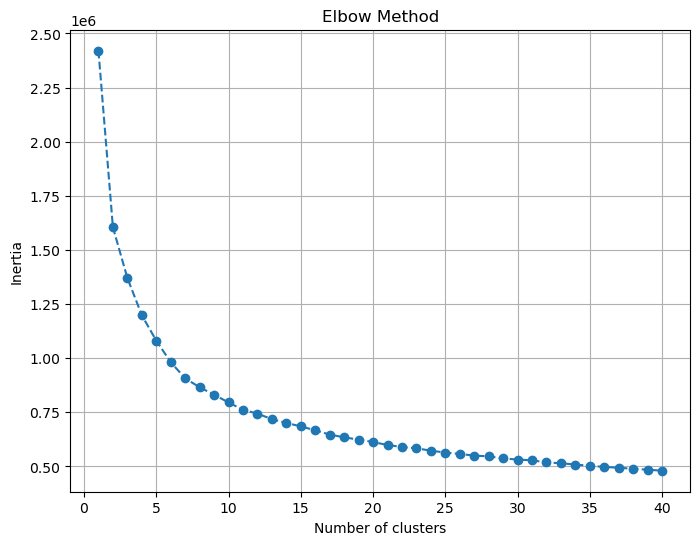

In [60]:
features_for_clustering = ['Calories', 'FatContent', 'SaturatedFatContent', 
                           'CholesterolContent', 'SodiumContent', 'CarbohydrateContent',
                           'FiberContent', 'SugarContent', 'ProteinContent']

X = alldf[features_for_clustering]

inertia = []
for k in range(1, 41):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
alldf['Cluster'] = kmeans.labels_
dataset['Cluster'] = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.plot(range(1, 41), inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

Cluster Centers:
    Calories  FatContent  SaturatedFatContent  CholesterolContent  \
0  -0.789148   -0.355989            -0.112764           -0.161598   
1   1.629203    1.062534             1.007137            0.949008   
2  -2.378755   -2.450346            -2.094960           -1.366925   
3   0.063965    0.345736             0.676467            0.474401   
4   0.035076   -0.190727            -0.199142           -0.102751   
5  -1.701054   -1.869854            -1.834804           -1.309408   
6  -1.317539   -1.296438            -1.347583           -1.203057   
7  -0.428891    0.404502             0.623394            0.475153   
8  -0.309955   -0.706777            -0.852372           -1.109406   
9  -0.487385   -0.240113            -0.122932            0.154636   
10 -0.681803   -2.073322            -2.078054           -1.373481   
11  1.158830    1.125216             1.095875            1.189037   
12 -0.654073   -1.426201            -1.478335           -1.290632   
13 -0.744769   -0

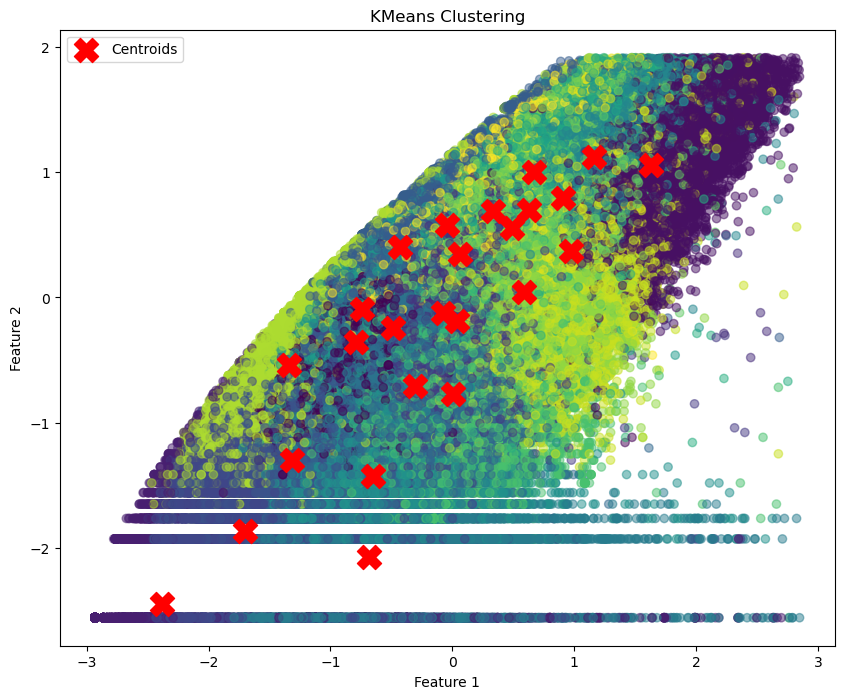

In [61]:
k = 25
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

alldf['Cluster'] = kmeans.labels_
dataset['Cluster'] = kmeans.labels_

cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features_for_clustering)
print("Cluster Centers:")
print(cluster_centers)

plt.figure(figsize=(10, 8))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

## Splitting the Dataset

In [62]:
X = alldf.drop('Cluster', axis=1)
y = alldf['Cluster']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (268885, 16)
Shape of y: (268885,)


In [63]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [64]:
X_train.head()

,Name,RecipeIngredientParts,RecipeInstructions,CookTime,PrepTime,TotalTime,RecipeId,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
192473,0.195046,-1.137461,0.683460,-0.550442,-0.688220,0.400844,0.740995,-0.077163,0.679077,-0.091578,-1.390704,0.724144,-0.464436,-0.522687,0.490014,-0.505840
67842,-0.448065,0.088921,1.565901,1.003463,1.756302,-1.754148,-0.847099,0.096873,-0.254958,-0.674646,-1.390704,-0.705417,0.912082,1.620629,0.160465,-0.106097
106784,1.481171,0.087340,1.422019,1.550500,1.756302,1.555138,-0.339458,1.141320,0.655088,0.043846,0.877318,2.015600,0.808363,1.829642,0.566739,1.749288
103715,-0.215282,-1.367598,-1.078917,1.550500,1.905689,1.806476,-0.379893,-0.836971,-0.319449,-0.290901,-0.370282,-0.616982,-0.339983,-0.606799,0.007150,-1.074266
165991,0.840537,0.996291,0.348509,-1.113335,1.756302,-0.604509,0.403973,-0.576156,-0.560059,-0.831286,-0.135780,-0.359241,0.070257,-0.697166,-0.428072,-0.505840


In [65]:
X_test = pd.DataFrame({
    'Name': [-0.497398],
    'RecipeIngredientParts': [1.542375],
    'RecipeInstructions': [0.943773],
    'CookTime': [-0.190979],
    'PrepTime': [-1.594561],
    'TotalTime': [1.209362],
    'RecipeId': [0.485963],
    'Calories': [-1.647316],
    'FatContent': [1.166651],
    'SaturatedFatContent': [0.687438],
    'CholesterolContent': [1.296335],
    'SodiumContent': [0.563838],
    'CarbohydrateContent': [1.510075],
    'FiberContent': [-1.108424],
    'SugarContent': [-1.983573],
    'ProteinContent': [1.809318]
}, index=[0])

## Decision Tree

In [66]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [67]:
decision_predictions = decision_tree.predict(x_test)
decision_predictions

array([ 0,  9, 13, ...,  7,  9, 21])

In [68]:
accuracy = accuracy_score(y_test, decision_predictions)
classification_rep = classification_report(y_test, decision_predictions)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      3120
           1       0.91      0.91      0.91      3094
           2       0.97      0.97      0.97      1231
           3       0.86      0.85      0.85      3214
           4       0.82      0.82      0.82      2551
           5       0.90      0.90      0.90      1640
           6       0.85      0.84      0.84      1619
           7       0.83      0.83      0.83      2013
           8       0.81      0.81      0.81      1663
           9       0.79      0.80      0.80      2825
          10       0.93      0.94      0.94      1382
          11       0.87      0.86      0.86      3295
          12       0.88      0.89      0.88      1578
          13       0.84      0.82      0.83      1808
          14       0.87      0.87      0.87      1926
          15       0.84      0.85      0.84      1517
          16       0.84      0.86      0.

In [69]:
deci_train_score = decision_tree.score(X_train, Y_train)
deci_test_score = decision_tree.score(x_test,y_test)

print("Decision Tree Train Score:", deci_train_score)
print("Decision Tree Test Score:", deci_test_score)

Decision Tree Train Score: 1.0
Decision Tree Test Score: 0.8483738401175224


In [70]:
def recipe_recommender(classifier, X_data, original_df, num_recommendations=5):
    predicted_clusters = classifier.predict(X_data)
    
    recommendations = pd.DataFrame()
    
    unique_clusters = set(predicted_clusters)
    for cluster in unique_clusters:
        cluster_indices = [i for i, label in enumerate(predicted_clusters) if label == cluster]
        recipes_in_cluster = original_df.iloc[cluster_indices]
        
        if len(recipes_in_cluster) > 0:
            recommended_recipes = recipes_in_cluster.sample(n=min(num_recommendations, len(recipes_in_cluster)))
            recommendations = pd.concat([recommendations, recommended_recipes])
    
    if len(recommendations) < num_recommendations:
        additional_needed = num_recommendations - len(recommendations)
        all_recipes = original_df.sample(n=min(additional_needed, len(original_df)))
        recommendations = pd.concat([recommendations, all_recipes]).drop_duplicates().head(num_recommendations)
    else:
        recommendations = recommendations.head(num_recommendations)
    
    for index, recipe in recommendations.iterrows():
        print("Recipe Name:", recipe['Name'])
        print("\nIngredients:", recipe['RecipeIngredientParts'])
        print("\nInstructions:", recipe['RecipeInstructions'])
        print("\nNutritional Information:")
        print("- Calories:", recipe['Calories'])
        print("- Protein:", recipe['ProteinContent'])
        print("- Fat:", recipe['FatContent'])
        print("- Carbohydrates:", recipe['CarbohydrateContent'])
        print()

recipe_recommender(decision_tree, X_test, dataset, num_recommendations=5)

Recipe Name: Low-Fat Berry Blue Frozen Dessert

Ingredients: c("blueberries", "granulated sugar", "vanilla yogurt", "lemon juice")

Instructions: c("Toss 2 cups berries with sugar.", "Let stand for 45 minutes, stirring occasionally.", "Transfer berry-sugar mixture to food processor.", "Add yogurt and process until smooth.", "Strain through fine sieve. Pour into baking pan (or transfer to ice cream maker and process according to manufacturers' directions). Freeze uncovered until edges are solid but centre is soft.  Transfer to processor and blend until smooth again.", "Return to pan and freeze until edges are solid.", "Transfer to processor and blend until smooth again.", 
"Fold in remaining 2 cups of blueberries.", "Pour into plastic mold and freeze overnight. Let soften slightly to serve.")

Nutritional Information:
- Calories: 170.9
- Protein: 3.2
- Fat: 2.5
- Carbohydrates: 37.1

Recipe Name: Edna's Ginger Cookies

Ingredients: c("butter", "sugar", "egg", "flour", "baking soda", "ci

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 50, 100],
    'min_samples_split': [10, 20], 
    'min_samples_leaf': [4, 8] 
}

grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
test_score = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Test Set Score:", test_score)
print("\nClassification Report:\n", classification_rep)

## Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [73]:
rf_predictions = rf_classifier.predict(x_test)
rf_predictions

array([ 0,  9, 13, ...,  7,  7, 21])

In [74]:
accuracy = accuracy_score(y_test, rf_predictions)
classification_rep = classification_report(y_test, rf_predictions)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      3120
           1       0.95      0.96      0.96      3094
           2       0.98      0.98      0.98      1231
           3       0.94      0.92      0.93      3214
           4       0.91      0.93      0.92      2551
           5       0.95      0.95      0.95      1640
           6       0.93      0.92      0.93      1619
           7       0.93      0.91      0.92      2013
           8       0.93      0.91      0.92      1663
           9       0.87      0.93      0.90      2825
          10       0.98      0.96      0.97      1382
          11       0.93      0.94      0.94      3295
          12       0.94      0.94      0.94      1578
          13       0.92      0.91      0.92      1808
          14       0.96      0.92      0.94      1926
          15       0.94      0.93      0.94      1517
          16       0.94      0.93      0.

In [75]:
train_score = rf_classifier.score(X_train, Y_train)
test_score = rf_classifier.score(x_test, y_test)

print("Random Forest Train Score:", train_score)
print("Random Forest Test Score:", test_score)

Random Forest Train Score: 1.0
Random Forest Test Score: 0.9302489912044183


In [76]:
def recipe_recommender(classifier, X_data, original_df, num_recommendations=5):
    predicted_clusters = classifier.predict(X_data)
    
    recommendations = pd.DataFrame()
    
    unique_clusters = set(predicted_clusters)
    for cluster in unique_clusters:
        recipes_in_cluster = original_df[original_df['Cluster'] == cluster]
        
        if len(recipes_in_cluster) > 0:
            recommended_recipes = recipes_in_cluster.sample(n=min(num_recommendations, len(recipes_in_cluster)))
            recommendations = pd.concat([recommendations, recommended_recipes])
    
    if len(recommendations) < num_recommendations:
        additional_needed = num_recommendations - len(recommendations)
        all_recipes = original_df.sample(n=min(additional_needed, len(original_df)))
        recommendations = pd.concat([recommendations, all_recipes]).drop_duplicates().head(num_recommendations)
    else:
        recommendations = recommendations.head(num_recommendations)
    
    for index, recipe in recommendations.iterrows():
        print("Recipe Name:", recipe['Name'])
        print("\nIngredients:", recipe['RecipeIngredientParts'])
        print("\nInstructions:", recipe['RecipeInstructions'])
        print("\nNutritional Information:")
        print("- Calories:", recipe['Calories'])
        print("- Protein:", recipe['ProteinContent'])
        print("- Fat:", recipe['FatContent'])
        print("- Carbohydrates:", recipe['CarbohydrateContent'])
        print()

recipe_recommender(rf_classifier, X_test, dataset, num_recommendations=5)

Recipe Name: Sweet Lemon Fruit Dip

Ingredients: c("low-fat sour cream", "sugar-free instant vanilla pudding mix", "nonfat milk", "lemon juice", "lemon, rind of")

Instructions: c("In a bowl, whisk the sour cream, pudding mix, milk, lemon juice and peel until very well blended.", "Serve with fruit (cantelope, honey dew melon, apples, grapes, etc).")

Nutritional Information:
- Calories: 339.8
- Protein: 8.2
- Fat: 29.1
- Carbohydrates: 12.7

Recipe Name: Blue Ribbon Strawberry Rhubarb Pie

Ingredients: c("sugar", "lemon juice", "strawberry", "frozen rhubarb", "dry tapioca", "milk", "sugar")

Instructions: c("Combine sugar, preserves and lemon juice.", "Add strawberries, rhubarb and tapioca.", "Set aside for 10 minutes.", "Adjust oven rack to lower 1/3 of oven.", "Preheat oven to 400 degrees fahrenheit.", "Prepare bottom crust in pie plate.", "Pour in fruit.", "Top with decorated crust-top. (I like a lattice top.).", "Brush with milk and sprinkle with sugar.", "Place on foil-lined bakin

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [4, 8],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
test_score = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Test Set Score:", test_score)
print("\nClassification Report:\n", classification_rep)


Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 20}
Best Score: 0.9156191167318177
Test Set Score: 0.919779831526489

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      3120
           1       0.95      0.95      0.95      3094
           2       0.98      0.98      0.98      1231
           3       0.93      0.91      0.92      3214
           4       0.90      0.91      0.91      2551
           5       0.94      0.94      0.94      1640
           6       0.92      0.91      0.92      1619
           7       0.93      0.90      0.92      2013
           8       0.92      0.89      0.90      1663
           9       0.86      0.92      0.89      2825
          10       0.98      0.95      0.97      1382
          11       0.92      0.94      0.93      3295
          12       0.93      0.94      0.94      1578
          13       0.92  

## K-NearestNeighbors 

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [78]:
knn_predictions = knn.predict(x_test)
knn_predictions

array([ 0,  0,  0, ..., 19,  9, 21])

In [79]:
accuracy = accuracy_score(y_test, knn_predictions)
classification_rep = classification_report(y_test, knn_predictions)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.90      0.81      3120
           1       0.81      0.88      0.84      3094
           2       0.95      0.93      0.94      1231
           3       0.73      0.84      0.78      3214
           4       0.72      0.70      0.71      2551
           5       0.79      0.81      0.80      1640
           6       0.77      0.78      0.78      1619
           7       0.76      0.77      0.77      2013
           8       0.70      0.76      0.73      1663
           9       0.68      0.74      0.71      2825
          10       0.88      0.89      0.88      1382
          11       0.75      0.85      0.80      3295
          12       0.87      0.78      0.82      1578
          13       0.76      0.74      0.75      1808
          14       0.83      0.82      0.83      1926
          15       0.81      0.76      0.78      1517
          16       0.83      0.74      0.

In [80]:
train_score = knn.score(X_train, Y_train)
test_score = knn.score(x_test, y_test)

print("KNN Train Score:", train_score)
print("KNN Test Score:", test_score)

KNN Train Score: 0.8747140971047102
KNN Test Score: 0.7798501217992823


In [81]:
def recipe_recommender(classifier, X_data, original_df, num_recommendations=5):
    predicted_clusters = classifier.predict(X_data)
    
    recommendations = pd.DataFrame()
    
    unique_clusters = set(predicted_clusters)
    for cluster in unique_clusters:
        recipes_in_cluster = original_df[original_df['Cluster'] == cluster]
        
        if len(recipes_in_cluster) > 0:
            recommended_recipes = recipes_in_cluster.sample(n=min(num_recommendations, len(recipes_in_cluster)))
            recommendations = pd.concat([recommendations, recommended_recipes])
    
    if len(recommendations) < num_recommendations:
        additional_needed = num_recommendations - len(recommendations)
        all_recipes = original_df.sample(n=min(additional_needed, len(original_df)))
        recommendations = pd.concat([recommendations, all_recipes]).drop_duplicates().head(num_recommendations)
    else:
        recommendations = recommendations.head(num_recommendations)
    
    for index, recipe in recommendations.iterrows():
        print("Recipe Name:", recipe['Name'])
        print("\nIngredients:", recipe['RecipeIngredientParts'])
        print("\nInstructions:", recipe['RecipeInstructions'])
        print("\nNutritional Information:")
        print("- Calories:", recipe['Calories'])
        print("- Protein:", recipe['ProteinContent'])
        print("- Fat:", recipe['FatContent'])
        print("- Carbohydrates:", recipe['CarbohydrateContent'])
        print()

recipe_recommender(knn, X_test, dataset, num_recommendations=5)

Recipe Name: Microwave Meatballs

Ingredients: c("ground turkey", "ground beef", "water", "dried basil", "dried oregano", "dried parsley", "garlic powder", "egg", "parmesan cheese", "mozzarella cheese")

Instructions: c("Mix ground meat, bread crumbs, water, basil, oregano, parsley, garlic powder, and egg.", "Form mixture into about 15 meatballs.", "Put meatballs in a microwave safe baking dish.", "Cover with spaghetti sauce and parmesan cheese.", "Cover dish with plastic wrap and microwave at 70% power for 12 minutes.", "Uncover; add Mozzarella cheese.", "Microwave at 70% power for 1 to 1-1/2 minutes or until the cheese is melted.")

Nutritional Information:
- Calories: 432.7
- Protein: 31.0
- Fat: 21.0
- Carbohydrates: 28.6

Recipe Name: Dried-Beef Casserole

Ingredients: c("macaroni", "sharp cheddar cheese", "onion", "milk")

Instructions: "Mix everything in a large bowl. Let stand 3 hours or overnight. Bake at 350 degrees for 45 minutes."

Nutritional Information:
- Calories: 524.7

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [10, 20, 50, 100],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [40, 50, 60],
    'p': [1, 2]
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
test_score = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Test Set Score:", test_score)
print("\nClassification Report:\n", classification_rep)

## Support Vector Machine

In [82]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(kernel='linear', random_state=42)  # You can choose different kernels like 'rbf', 'poly', etc.

svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [83]:
svm_predictions = svm_classifier.predict(x_test)
svm_predictions

array([ 0,  9, 13, ...,  7,  7, 21])

In [84]:
accuracy = accuracy_score(y_test, svm_predictions)
classification_rep = classification_report(y_test, svm_predictions)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3120
           1       0.99      1.00      0.99      3094
           2       0.99      1.00      1.00      1231
           3       0.99      0.99      0.99      3214
           4       0.99      0.98      0.99      2551
           5       0.99      0.98      0.99      1640
           6       0.98      0.99      0.98      1619
           7       0.99      0.98      0.98      2013
           8       0.98      0.98      0.98      1663
           9       0.98      0.99      0.98      2825
          10       0.99      0.99      0.99      1382
          11       0.99      0.99      0.99      3295
          12       0.99      0.98      0.98      1578
          13       0.98      0.98      0.98      1808
          14       0.99      0.99      0.99      1926
          15       0.99      0.99      0.99      1517
          16       0.99      0.99      0.

In [85]:
train_score = knn.score(X_train, Y_train)
test_score = knn.score(x_test, y_test)

print("SVM Train Score:", train_score)
print("SVM Test Score:", test_score)

SVM Train Score: 0.8747140971047102
SVM Test Score: 0.7798501217992823


In [86]:
import pandas as pd

def recipe_recommender(classifier, X_data, original_df, num_recommendations=5):
    predicted_clusters = classifier.predict(X_data)
    
    recommendations = pd.DataFrame()
    
    unique_clusters = set(predicted_clusters)
    for cluster in unique_clusters:
        recipes_in_cluster = original_df[original_df['Cluster'] == cluster]
        
        if len(recipes_in_cluster) > 0:
            recommended_recipes = recipes_in_cluster.sample(n=min(num_recommendations, len(recipes_in_cluster)))
            recommendations = pd.concat([recommendations, recommended_recipes])
    
    if len(recommendations) < num_recommendations:
        additional_needed = num_recommendations - len(recommendations)
        all_recipes = original_df.sample(n=min(additional_needed, len(original_df)))
        recommendations = pd.concat([recommendations, all_recipes]).drop_duplicates().head(num_recommendations)
    else:
        recommendations = recommendations.head(num_recommendations)
    
    for index, recipe in recommendations.iterrows():
        print("Recipe Name:", recipe['Name'])
        print("\nIngredients:", recipe['RecipeIngredientParts'])
        print("\nInstructions:", recipe['RecipeInstructions'])
        print("\nNutritional Information:")
        print("- Calories:", recipe['Calories'])
        print("- Protein:", recipe['ProteinContent'])
        print("- Fat:", recipe['FatContent'])
        print("- Carbohydrates:", recipe['CarbohydrateContent'])
        print()

recipe_recommender(svm_classifier, X_test, dataset, num_recommendations=5)

Recipe Name: Linda's Taco Rice Bake

Ingredients: c("ground beef", "onions", "cayenne pepper", "tomatoes and green chilies", "rice", "mozzarella cheese")

Instructions: c("Cook rice.", "Cook the ground beef until no longer pink.", "Add onions, cayenne pepper, and taco mix. Mix well, and cook until onions are done.", "Add Ro-tel tomatoes, and rice. Mix well.", "Add salt and pepper, and mix well.", "Add Mozzarella cheese, and mix in well.", "When cheese is melted serve.", "Note:Cooking time includes 25 minutes to make rice.")

Nutritional Information:
- Calories: 1310.5
- Protein: 59.4
- Fat: 40.9
- Carbohydrates: 170.0

Recipe Name: Jennah's Carne Asada Tacos

Ingredients: c("radishes", "cilantro", "corn tortillas", "butter", "seasoning salt", "salsa verde", "lime")

Instructions: c("Heat a non stick skillet over medium heat.", "Apply butter to the the tortillas.", "Fry on each side til warm and pliable.", "Keep tortillas warm in foil or holder.", "Heat a large skillet over high heat.",

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm_classifier = SVC(random_state=42)

param_grid = {
    'C': [10, 20, 50, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
test_score = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Test Set Score:", test_score)
print("\nClassification Report:\n", classification_rep)

## Comparing Models

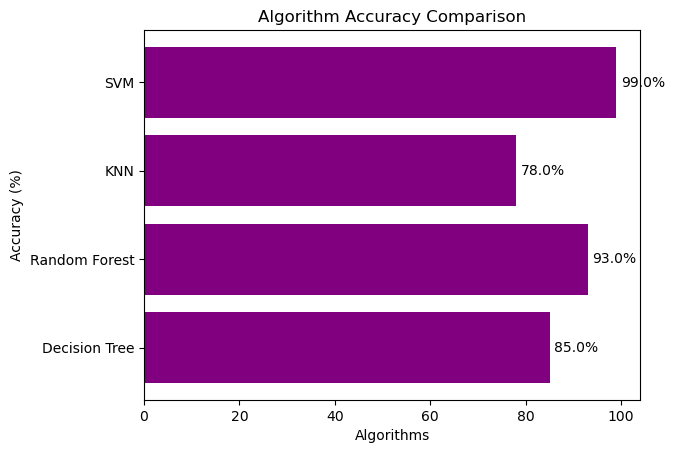

In [87]:
algorithms = ['Decision Tree', 'Random Forest','KNN', 'SVM']

accuracy = [85.00, 93.00, 78.00, 99.00]

plt.barh(algorithms, accuracy, color='purple')

plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Algorithm Accuracy Comparison')
for i in range(len(algorithms)):
    plt.text(accuracy[i] + 1, i, f'{accuracy[i]}%', ha='left', va='center')
    
plt.show()

## Training Unsupervised Model

In [88]:
XM = dataset.iloc[:,6:15]

In [89]:
XM

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2
1,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4
2,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3
3,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3
4,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3
...,...,...,...,...,...,...,...,...,...
268880,250.2,15.9,9.4,52.1,93.5,27.0,1.1,19.1,2.6
268881,45.6,1.5,0.2,5.8,63.9,7.4,1.8,3.0,1.6
268882,328.7,30.2,8.3,22.3,61.6,15.5,10.2,1.5,4.7
268883,53.9,3.4,0.5,0.0,0.5,6.7,0.2,5.3,0.1


In [90]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors
import pandas as pd

def scaling(dataframe):
    scaler = StandardScaler()
    prep_data = scaler.fit_transform(dataframe.iloc[:, 6:15].to_numpy())
    return prep_data, scaler

def nn_predictor(prep_data):
    neigh = NearestNeighbors(metric='cosine', algorithm='brute')
    neigh.fit(prep_data)
    return neigh

def build_pipeline(neigh, scaler, params):
    transformer = FunctionTransformer(neigh.kneighbors, kw_args=params)
    pipeline = Pipeline([('std_scaler', scaler), ('NN', transformer)])
    return pipeline

def extract_data(dataframe, ingredient_filter, max_nutritional_values):
    extracted_data = dataframe.copy()
    for column in extracted_data.columns[6:15]:
        maximum = max_nutritional_values[column]
        extracted_data = extracted_data[extracted_data[column] < maximum]
    if ingredient_filter is not None:
        for ingredient in ingredient_filter:
            extracted_data = extracted_data[extracted_data['RecipeIngredientParts'].str.contains(ingredient, regex=False)]
    return extracted_data


def apply_pipeline(pipeline, _input, extracted_data):
    return extracted_data.iloc[pipeline.transform(_input)[0]]

def recommend(dataframe, _input, max_nutritional_values, ingredient_filter=None, params={'return_distance': False}):
    extracted_data = extract_data(dataframe, ingredient_filter, max_nutritional_values)
    prep_data, scaler = scaling(extracted_data)
    neigh = nn_predictor(prep_data)
    pipeline = build_pipeline(neigh, scaler, params)
    return apply_pipeline(pipeline, _input, extracted_data)

def save_pipeline(pipeline, filename):
    with open(filename, 'wb') as f:
        pickle.dump(pipeline, f)

def load_pipeline(filename):
    with open(filename, 'rb') as f:
        pipeline = pickle.load(f)
    return pipeline

In [91]:
XX_test = pd.DataFrame({
    'Calories': [-1.647316],
    'FatContent': [1.166651],
    'SaturatedFatContent': [0.687438],
    'CholesterolContent': [1.296335],
    'SodiumContent': [0.563838],
    'CarbohydrateContent': [1.510075],
    'FiberContent': [-1.108424],
    'SugarContent': [-1.983573],
    'ProteinContent': [1.809318]
}, index=[0])

In [92]:
max_nutritional_values = {
    'Calories': 2000,
    'FatContent': 100,
    'SaturatedFatContent': 13,
    'CholesterolContent': 300,
    'SodiumContent': 2300,
    'CarbohydrateContent': 325,
    'FiberContent': 40,
    'SugarContent': 40,
    'ProteinContent': 200
}



recommendations = recommend(dataset, XX_test, max_nutritional_values)

print("Recommended Recipes:")
print(recommendations)

Recommended Recipes:
        RecipeId                                      Name CookTime PrepTime  \
202037    210834              Pizza Stuffed Cabbage Leaves    PT30M     PT5M   
91456      96776        Broccoli With Walnut-garlic Butter     PT5M     PT5M   
134776    141486                         Hamburger Wontons     PT5M    PT10M   
97857     103350                   Deep Fried Cheese Balls    PT20M    PT10M   
18244      21605  Reduced Fat Double Layered Chocolate Pie     PT3H    PT15M   

       TotalTime                              RecipeIngredientParts  Calories  \
202037     PT35M  c("ground beef", "rice", "head of cabbage", "m...      91.9   
91456      PT10M  c("broccoli florets", "butter", "garlic", "wal...      38.1   
134776     PT15M  c("mushroom", "onion", "olive oil", "cheddar c...      70.4   
97857      PT30M  c("cheddar cheese", "shrimp", "cilantro", "jal...      83.1   
18244    PT3H15M  c("low fat graham cracker pie crust", "skim mi...      65.6   

        Fat

In [94]:
import pickle
save_pipeline(recommendations, 'pipeline.pkl')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'NN__n_neighbors': [5, 7],
    'NN__algorithm': ['brute', 'kd_tree', 'ball_tree'],
    'NN__leaf_size': [10, 20, 30, 40, 50],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(_input, extracted_data)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

best_pipeline = grid_search.best_estimator_

recommended_recipes = apply_pipeline(best_pipeline, _input, extracted_data)